In [5]:
from nltk.tokenize import word_tokenize
import re
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7212 non-null   object
 1   Target  6916 non-null   object
dtypes: object(2)
memory usage: 112.8+ KB


In [7]:
bow = CountVectorizer()
bow_rep = bow.fit_transform(data['Text'])
print("Shape of BoW matrix:", bow_rep.shape)

Shape of BoW matrix: (7212, 3248)


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


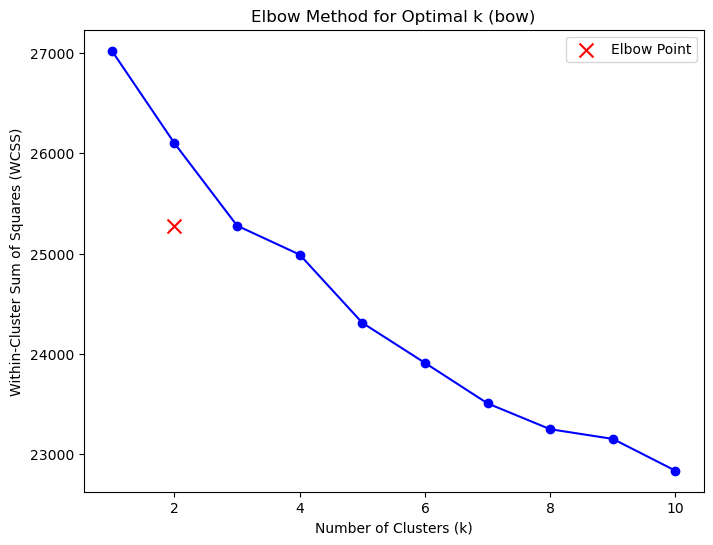

Optimal number of clusters (k): 3


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



# Create an empty list to store the within-cluster sum of squares (WCSS) for different k values
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(bow_rep)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k (bow)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

second_derivative = np.diff(np.diff(wcss))

# Find the index of the maximum value in the second derivative
elbow_index = np.argmax(second_derivative) + 1

# Mark the elbow point on the plot
plt.scatter(elbow_index, wcss[elbow_index], c='red', marker='x', s=100, label='Elbow Point')

plt.legend()
plt.show()

# Print the optimal k value
optimal_k = elbow_index + 1  # Adding 1 because the index starts from 0
print(f'Optimal number of clusters (k): {optimal_k}')


In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++')
model.fit(bow_rep)

KMeans(n_clusters=3)

Top terms per cluster:
Cluster 0: оронд байсан хүний ажиллаж түр ажилласан орон жирэмсний амралттай багшийн дээр тоон жирэмсэн тоонд авсан чөлөөтэй тул ажлын хугацаагаар жирэмсэний


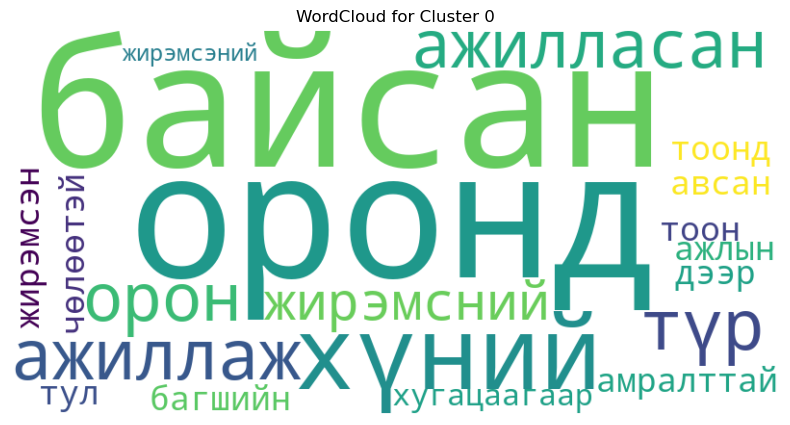

Cluster 1: болсон ажиллах өөр багшаар тул сургуульд багш ажиллахаар цэцэрлэгт шилжих арга ажилд байгууллагад туслах бүлгийн сургалтын суралцах орох сургууль шилжин


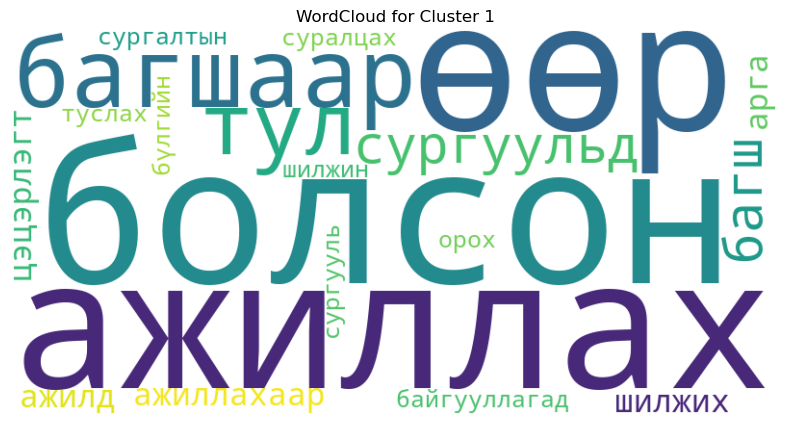

Cluster 2: шилжсэн өөр орсон ажилд цэцэрлэгт багшаар сургуульд томилогдсон орон ажилласан өөрийн хүсэлтээр албан руу гэр тушаал ажиллах байгууллагад татан түр


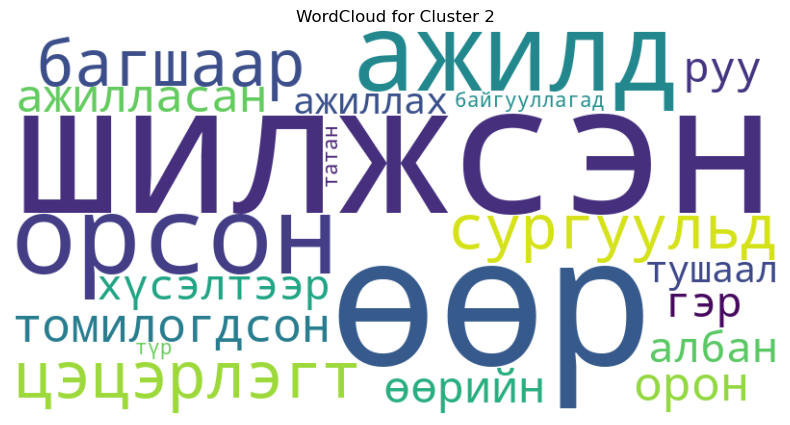

In [10]:
from wordcloud import WordCloud
 
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = bow.get_feature_names_out()

for i in range(3):
    print("Cluster %d:" % i, end='')
    top_words = []
    for ind in order_centroids[i, :20]:
        word = terms[ind]
        print(' %s' % word, end='')
        top_words.append(word)
    print()

    # Create a WordCloud for the current cluster's top words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

    # Display the WordCloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Cluster %d' % i)
    plt.show()
